Im Folgenden wird die Auswertung aus dem vorherigen Notebook in einer Funktion gebündelt, der man eine Liste aus Dateien geben kann, die dann automatisch verarbeitet wird. 

In [2]:
import pandas as pd

# Definition einer Funktion 'auswertung()' mit der mehrere csv Dateien eingelesen, sortiert, weiterverarbeteit und geplottet werden können
def auswertung(f_list):
    # Zunächst werden alle Daten aus den verschiedenen .csv-Dateien eingelesen und zu einem großen Dataframe zusammengeführt
    df_list = []
    for f in f_list: 
        df_list.append(pd.read_csv(f, sep='\t', parse_dates=[0], date_format='%d.%m.%y %H:%M:%S', decimal=','))
    df_full = pd.concat(df_list, ignore_index=True) 
    
    # Als nächstes gehen wir sicher, dass die Daten zeitlich richtig sortiert sind und setzen den Zeitstempel der Messdaten als neuen Index 
    df_full = df_full.sort_values(['Zeit'])
    df_full = df_full.set_index('Zeit')
    
    # Hier wird für jeden Zeitschritt der Mittelwert über die 4 Thermoelemente TC02, TC03, TC04 und TC05 gebildet
    TC_list = ['TC02', 'TC03', 'TC04', 'TC05']
    df_full['Mittlere Katalysatortemperatur'] = df_full[TC_list].mean(axis=1)
    
    # Um die Datenmenge zu reduzieren, werden die Messdaten hier über 5 Minuten gemittelt wiedergegeben. 
    # Zusätzlich wird für eine der Spalten auch die Standardabweichung ermittelt.
    window = '5min'
    df_resampled = df_full.resample(window).mean()
    df_resampled['STD NH3(%)'] = df_full['NH3 (%)'].resample(window).std()
    
    # Der zusammengefügte und bearbeitete Dataframe wird als neue .csv-Datei unter dem angegebenen Namen und Pfad gespeichert
    save_path = 'Daten\\Full.csv'
    df_resampled.to_csv(save_path, sep='\t', date_format='%d.%m.%y %H:%M:%S', decimal=',')
    
    # Beispielhaft wird hier der Verlauf des Ammoniakgehalts über die Zeit geplottet
    df_resampled[['NH3 (%)']].plot(title='Verlauf des Ammoniakgehalts im Produktgas', ylabel='NH3-Anteil [mol-%]', ylim=(0,120))


Da wir die Datenverarbeitung nun in einer Funktion gebündelt haben, können wir alle zuvor durchgeführten Schritte mit einem sehr geringen Aufwand wieder und wieder ausführen. 

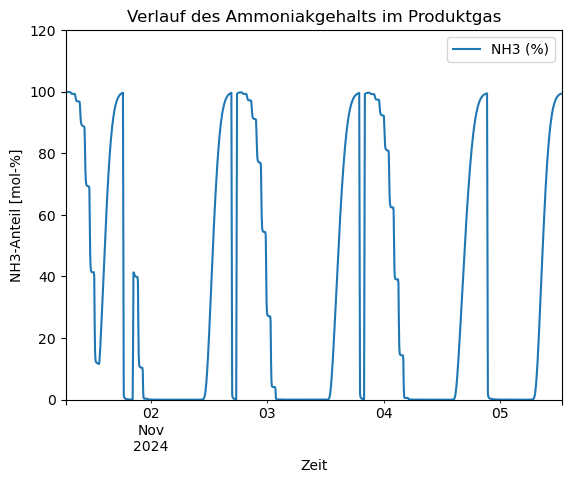

In [4]:
# Hier wählt man die Pfade der auszuwertenden Dateien aus
f_list = ['Daten\\_01_11_2024.csv', 'Daten\\_02_11_2024.csv', 'Daten\\_03_11_2024.csv', 'Daten\\_04_11_2024.csv', 'Daten\\_05_11_2024.csv']

# Indem man diese Pfade 
auswertung(f_list)